# Diabetes Dataset EDA
Group J, Yuxi Qiao

## Introduction
In this work, we perform an **exploratory data analysis (EDA)** and **preprocessing** on the Diabetes dataset. 
The dataset contains diagnostic measurements for female patients of Pima Indian heritage, and the objective is to predict whether a patient has diabetes (Outcome = 1) or not (Outcome = 0).

Specifically, this notebook is divided into 2 main parts:

1. **Exploratory Data Analysis (EDA)**  
   - Perform descriptive statistics for all numeric features to understand their distributions.  
   - Visualize the data using boxplots, scatter plots, and class balance plots (bar chart and pie chart).  
   - Inspect the dataset for missing values, duplicates, and invalid entries.  

2. **Data Cleaning and Comparison with Original Data**     
   - Add a new column `subject_id`for traceability.
   - Remove invalid rows (rows where some features have impossible values, such as 0 for Glucose, BloodPressure, SkinThickness, Insulin, or BMI).  
   - Compare cleaned data with original data to show the effect of cleaning.  
   - Normalize cleaned data
   
And then we package the data cleaning process as a function `load_and_clean_data(csv_path)` to automate loading, cleaning, and preprocessing of the dataset, which you can see in *SP_project_Function.ipynb*

## Part 0. Import Libraries and Prepare Environments

In [1]:
# Load libraries and prepare plotting environment 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


sns.set_theme(style="whitegrid", palette="Set1")

## Part 1. Exploratory Data Analysis (EDA)

In this part, we perform exploratory data analysis (EDA) on the Diabetes dataset. Including:

- 1.1 Load data and examine the dataset structure, basic statistics, and check for duplicates or invalid entries.  
- 1.2 Check the class balance.
- 1.3 Calculate the mean value of each group.
- 1.4 Visualize feature distributions with boxplots. 
- 1.5 Explore feature relationships.
- 1.6 Compute the correlation matrix.

### 1.1 Dataset Overview

In [2]:
# Load dataset

df_original = pd.read_csv('diabetes\diabetes.csv')
df_original.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Dataset overview

print("======== Dataset Overview ========")
print("Data Shape:", df_original.shape)

print("\n\n======== Column info (Variables) ========")
print(df_original.info())

print("\n\n======== Basic statistics ========")
print(df_original.describe())

# Check duplicates
print("\n\n======== Duplicated rows ========")
print(df_original.duplicated().sum())

======== Dataset Overview ========
Data Shape: (768, 9)


======== Column info (Variables) ========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


======== Basic statistics ========
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  76

### 1.2 Dataset Balance

In [4]:
# Number and ratio of each outcome
subjects_per_group = df_original.groupby("Outcome").size()
subjects_ratio = subjects_per_group / len(df_original)

# Indicate what 0 and 1 indicate
label_map = {0: "0 (Negative)", 1: "1 (Positive)"}

# Print the number and ratio of each outcome
print("===== Outcome and ratio =====")
for outcome in subjects_per_group.index:
    print(
        f"{label_map[outcome]}    "
        f"{subjects_per_group[outcome]}   "
        f"{subjects_ratio[outcome]:.6f}"
    )

===== Outcome and ratio =====
0 (Negative)    500   0.651042
1 (Positive)    268   0.348958


C:\Users\Qiao\AppData\Local\Temp\ipykernel_12744\2753341541.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label_map[int(t.get_text())] for t in ax.get_xticklabels()])


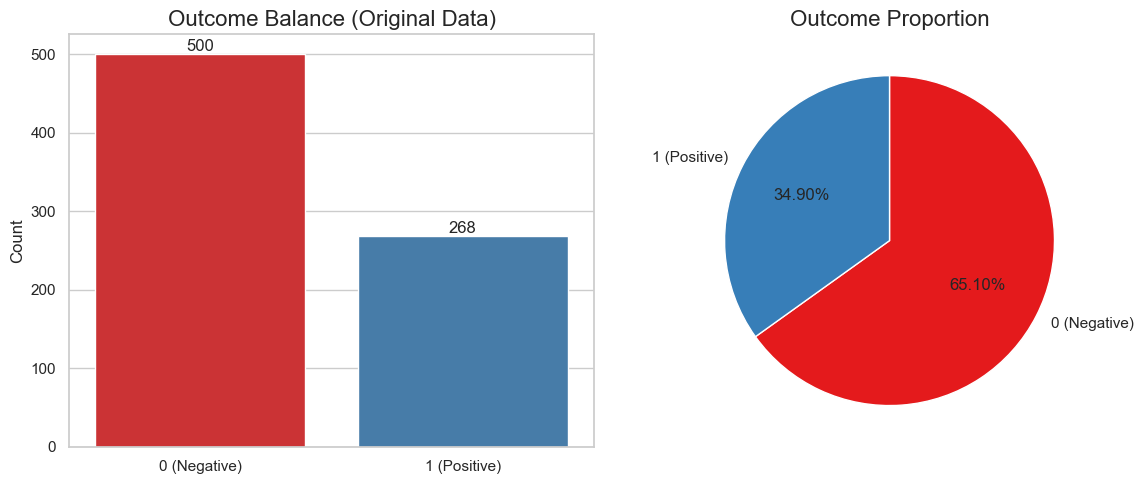

In [5]:
# Visualize dataset balance

# We plot a bar plot and a pie chart to visualize the count and the ratio of each group
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# -------- Bar plot --------
ax = sns.countplot(x="Outcome", data=df_original, ax=axs[0], hue="Outcome")
ax.set_xticklabels([label_map[int(t.get_text())] for t in ax.get_xticklabels()])
axs[0].set_title("Outcome Balance (Original Data)", fontsize=16)
axs[0].set_xlabel("")
axs[0].set_ylabel("Count")

for container in ax.containers:
    ax.bar_label(container)

ax.get_legend().remove()

# -------- Pie chart --------
axs[1].pie(
    subjects_ratio,
    labels=[label_map[i] for i in subjects_ratio.index],
    autopct="%.2f%%",
    startangle=90,
    counterclock=False
)
axs[1].set_title("Outcome Proportion", fontsize=16)


plt.tight_layout()
plt.show()

### 1.3 Mean values of each group

In [6]:
print("===== Mean values of each group =====")
df_original.groupby("Outcome").mean()

===== Mean values of each group =====


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### 1.4 Distributions and Outliers of Each Feature

C:\Users\Qiao\AppData\Local\Temp\ipykernel_12744\3487125786.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["0 (negative)", "1 (positive)"], fontsize=16)
C:\Users\Qiao\AppData\Local\Temp\ipykernel_12744\3487125786.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["0 (negative)", "1 (positive)"], fontsize=16)
C:\Users\Qiao\AppData\Local\Temp\ipykernel_12744\3487125786.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["0 (negative)", "1 (positive)"], fontsize=16)
C:\Users\Qiao\AppData\Local\Temp\ipykernel_12744\3487125786.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

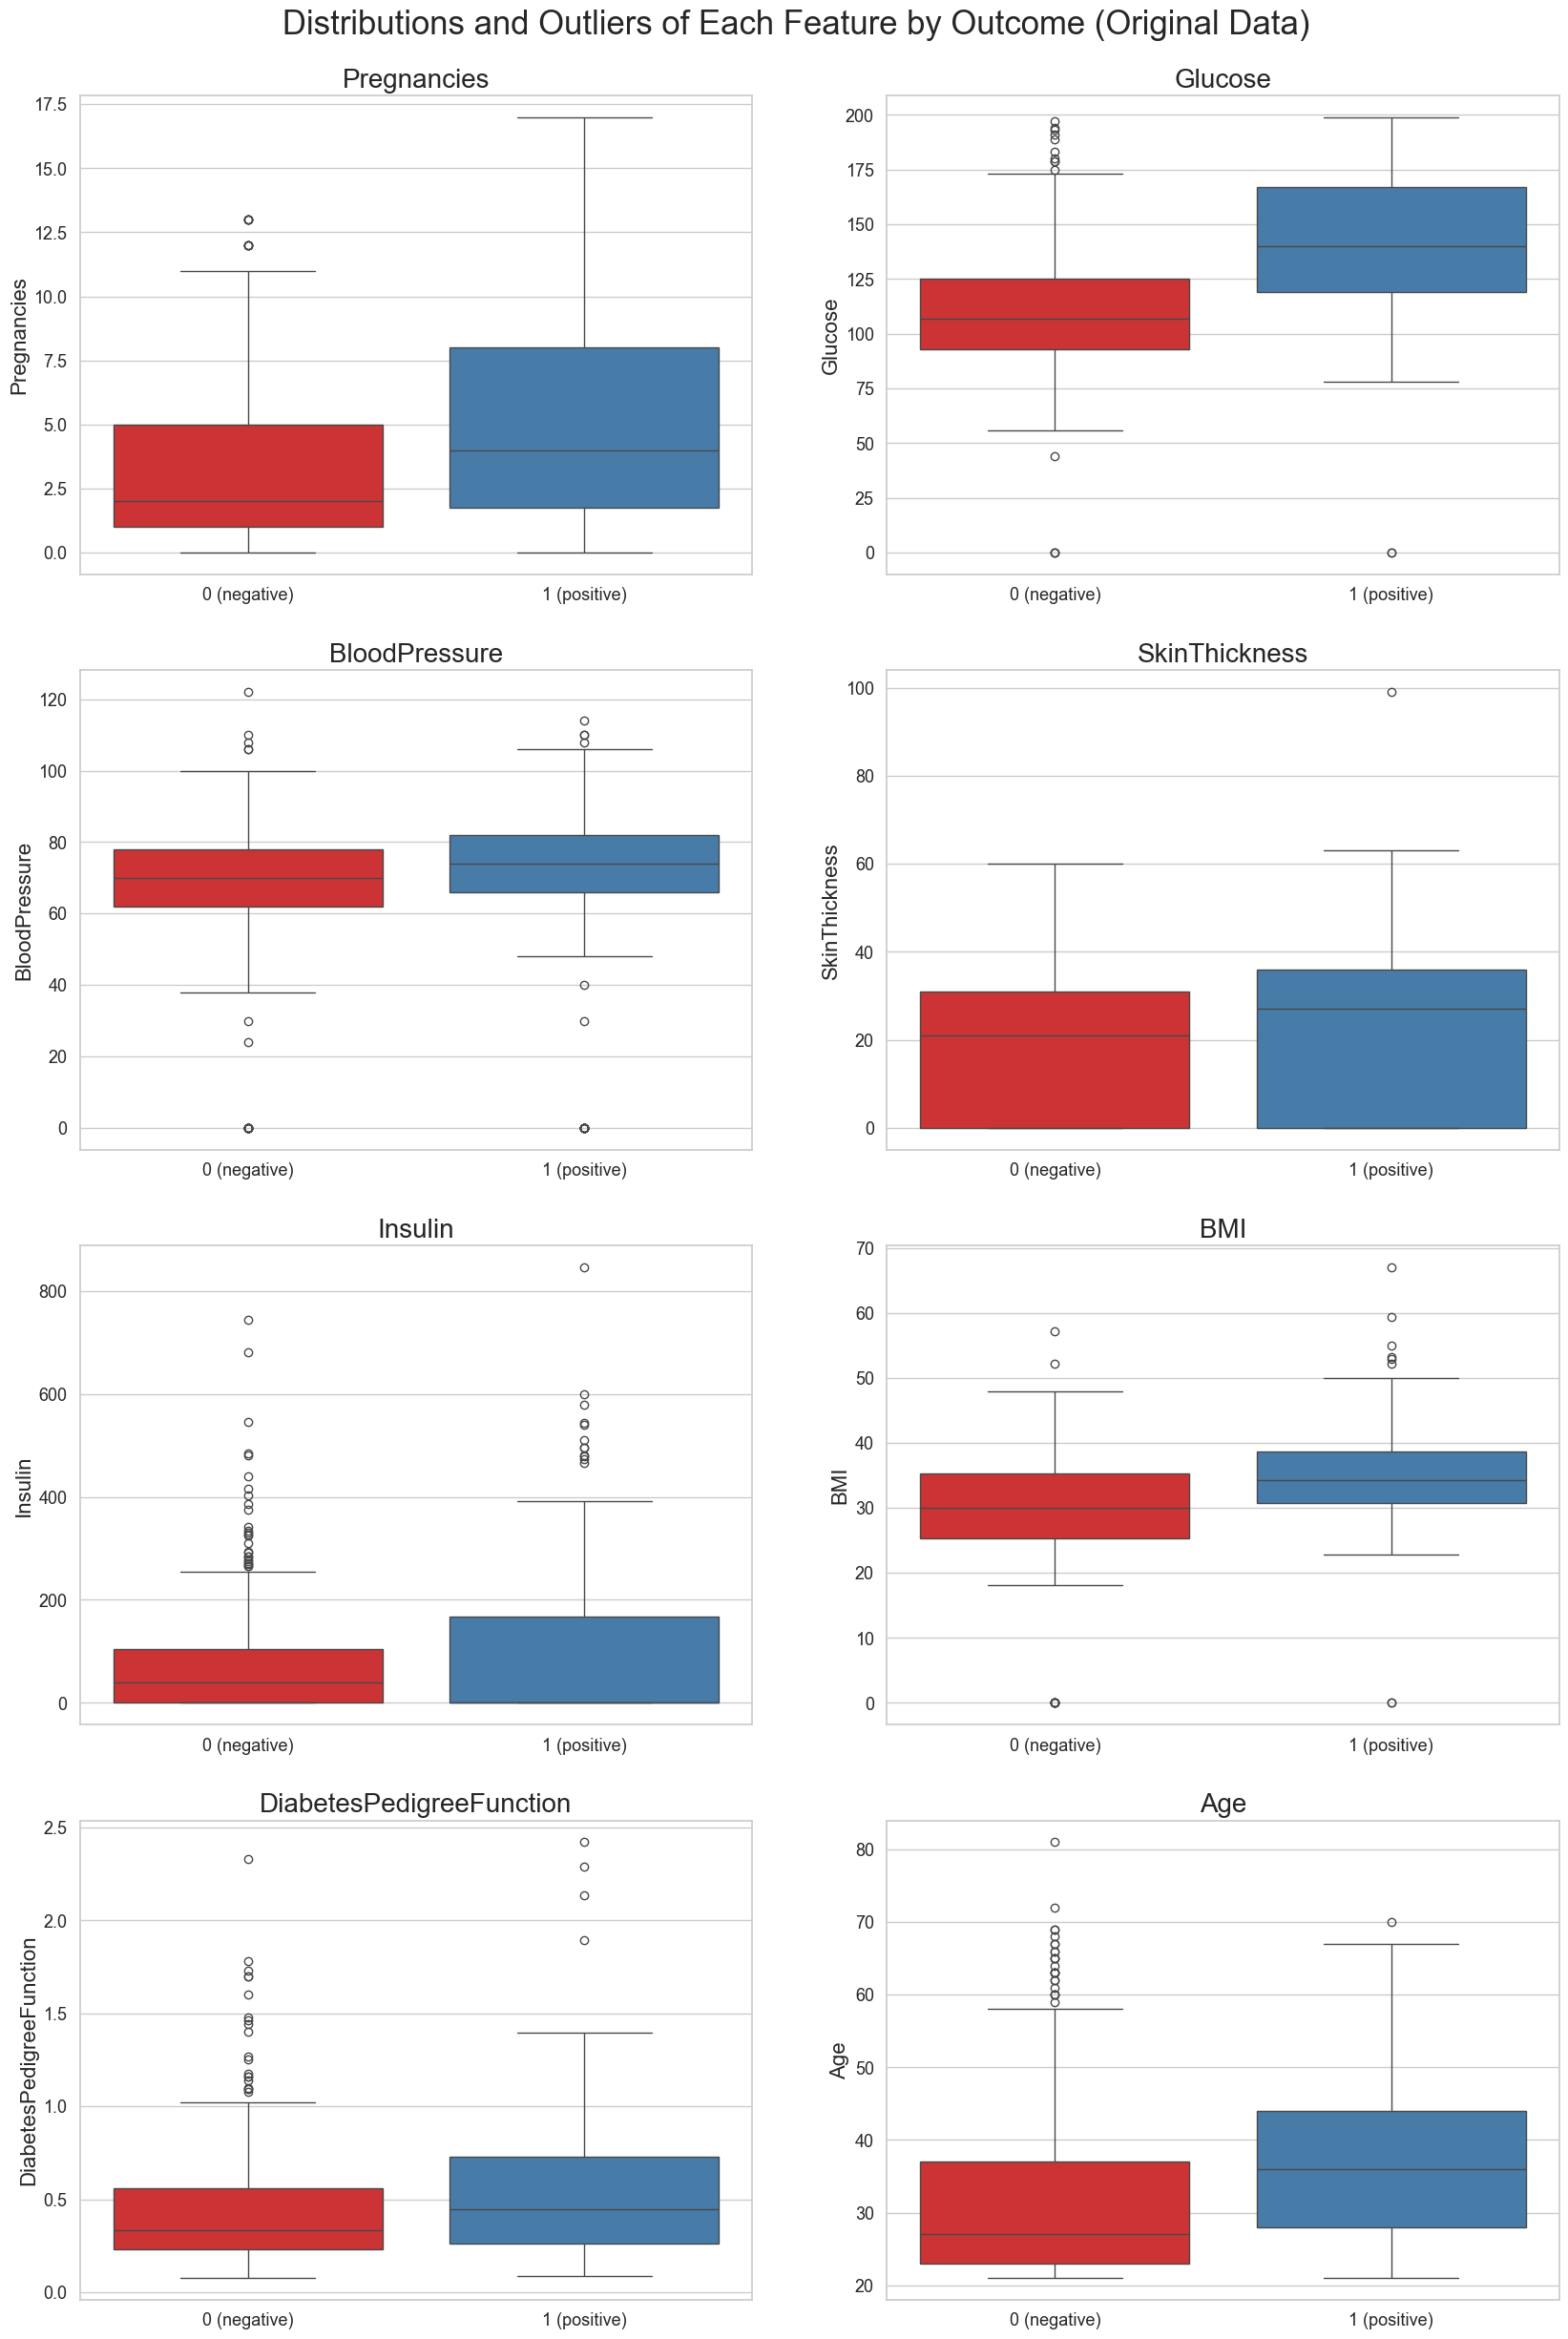

In [7]:
# Select features excluding the target variable 'Outcome'
features = df_original.columns.drop("Outcome")

# Create subplots: 4 rows x 2 columns
fig, axs = plt.subplots(4, 2, figsize=(20, 30))
axs = axs.flatten()

# Plot boxplots for each feature grouped by Outcome
for i, col in enumerate(features):
    sns.boxplot(x="Outcome", y=col, data=df_original, ax=axs[i], hue="Outcome")
    axs[i].set_xticklabels(["0 (negative)", "1 (positive)"], fontsize=16)
    axs[i].set_title(f"{col}", fontsize=20)
    axs[i].set_xlabel("", fontsize=16)
    axs[i].set_ylabel(col, fontsize=16)
    axs[i].tick_params(axis='y', labelsize=13)
    axs[i].tick_params(axis='x', labelsize=13)

    axs[i].get_legend().remove() if axs[i].get_legend() else None


# Set title
plt.suptitle("Distributions and Outliers of Each Feature by Outcome (Original Data)", fontsize=25, y=0.91)
plt.show()

### 1.5 Relationships between features

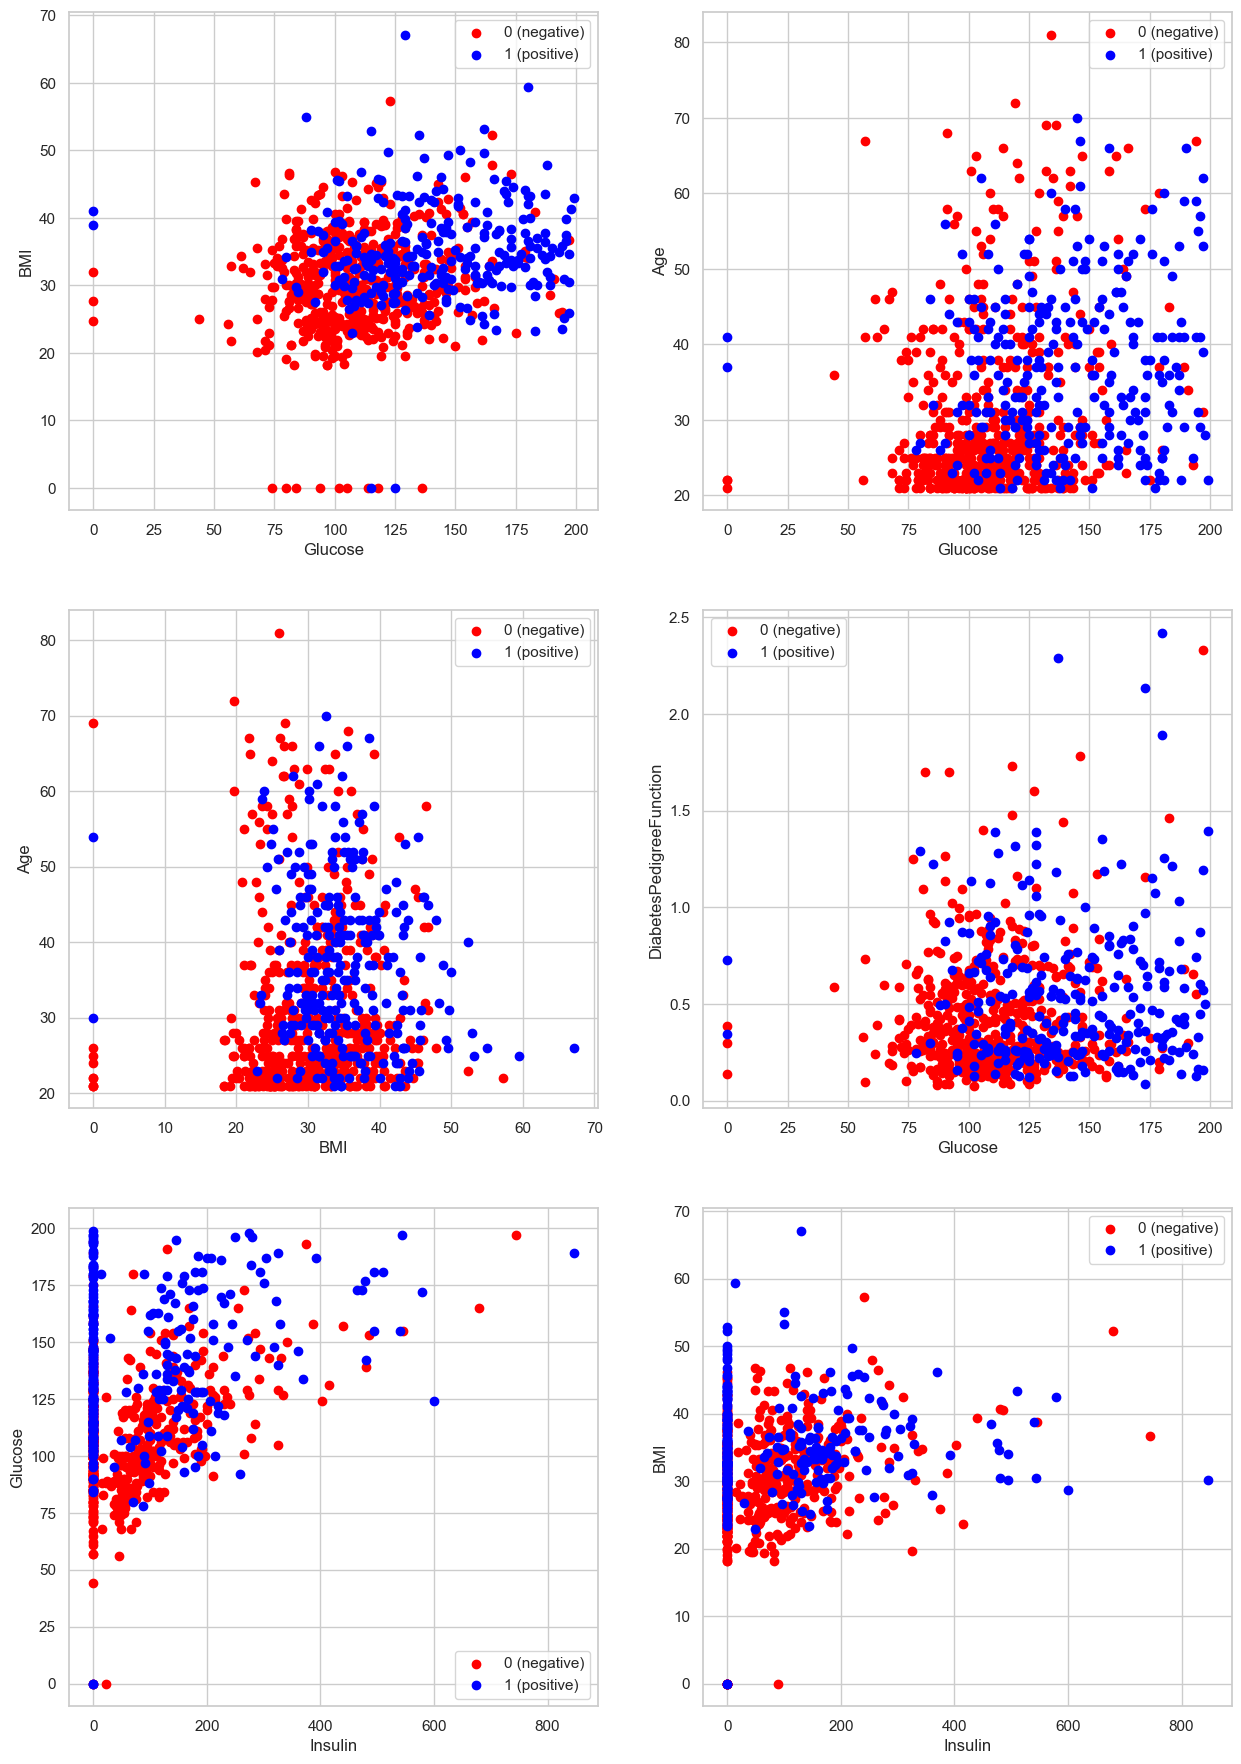

In [8]:
fig, axs = plt.subplots(3, 2,figsize=(15,22))

# Glucose vs BMI
axs[0,0].scatter(df_original.Glucose[df_original.Outcome == 0], df_original.BMI[df_original.Outcome == 0], color = 'red',  label = '0 (negative)')
axs[0,0].scatter(df_original.Glucose[df_original.Outcome == 1], df_original.BMI[df_original.Outcome == 1], color = 'blue',  label = '1 (positive)')
axs[0,0].set_xlabel('Glucose')
axs[0,0].set_ylabel('BMI')
axs[0,0].legend()

# Glucose vs Age
axs[0,1].scatter(df_original.Glucose[df_original.Outcome == 0], df_original.Age[df_original.Outcome == 0], color = 'red',  label = '0 (negative)')
axs[0,1].scatter(df_original.Glucose[df_original.Outcome == 1], df_original.Age[df_original.Outcome == 1], color = 'blue',  label = '1 (positive)')
axs[0,1].set_xlabel('Glucose')
axs[0,1].set_ylabel('Age')
axs[0,1].legend()

# BMI vs Age
axs[1,0].scatter(df_original.BMI[df_original.Outcome == 0], df_original.Age[df_original.Outcome == 0], color = 'red',  label = '0 (negative)')
axs[1,0].scatter(df_original.BMI[df_original.Outcome == 1], df_original.Age[df_original.Outcome == 1], color = 'blue',  label = '1 (positive)')
axs[1,0].set_xlabel('BMI')
axs[1,0].set_ylabel('Age')
axs[1,0].legend()

# Glucose vs DiabetesPedigreeFunction
axs[1,1].scatter(df_original.Glucose[df_original.Outcome == 0], df_original.DiabetesPedigreeFunction[df_original.Outcome == 0], color = 'red',  label = '0 (negative)')
axs[1,1].scatter(df_original.Glucose[df_original.Outcome == 1], df_original.DiabetesPedigreeFunction[df_original.Outcome == 1], color = 'blue',  label = '1 (positive)')
axs[1,1].set_xlabel('Glucose')
axs[1,1].set_ylabel('DiabetesPedigreeFunction')
axs[1,1].legend()

# Insulin vs Glucose
axs[2,0].scatter(df_original.Insulin[df_original.Outcome == 0], df_original.Glucose[df_original.Outcome == 0], color = 'red',  label = '0 (negative)')
axs[2,0].scatter(df_original.Insulin[df_original.Outcome == 1], df_original.Glucose[df_original.Outcome == 1], color = 'blue',  label = '1 (positive)')
axs[2,0].set_xlabel('Insulin')
axs[2,0].set_ylabel('Glucose')
axs[2,0].legend()

# Insulin vs BMI
axs[2,1].scatter(df_original.Insulin[df_original.Outcome == 0], df_original.BMI[df_original.Outcome == 0], color = 'red',  label = '0 (negative)')
axs[2,1].scatter(df_original.Insulin[df_original.Outcome == 1], df_original.BMI[df_original.Outcome == 1], color = 'blue',  label = '1 (positive)')
axs[2,1].set_xlabel('Insulin')
axs[2,1].set_ylabel('BMI')
axs[2,1].legend()

plt.show()

### 1.6 Correlation Matrix

In [9]:
# Compute the correlation matrix for all features and the outcome
corr_matrix = df_original.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


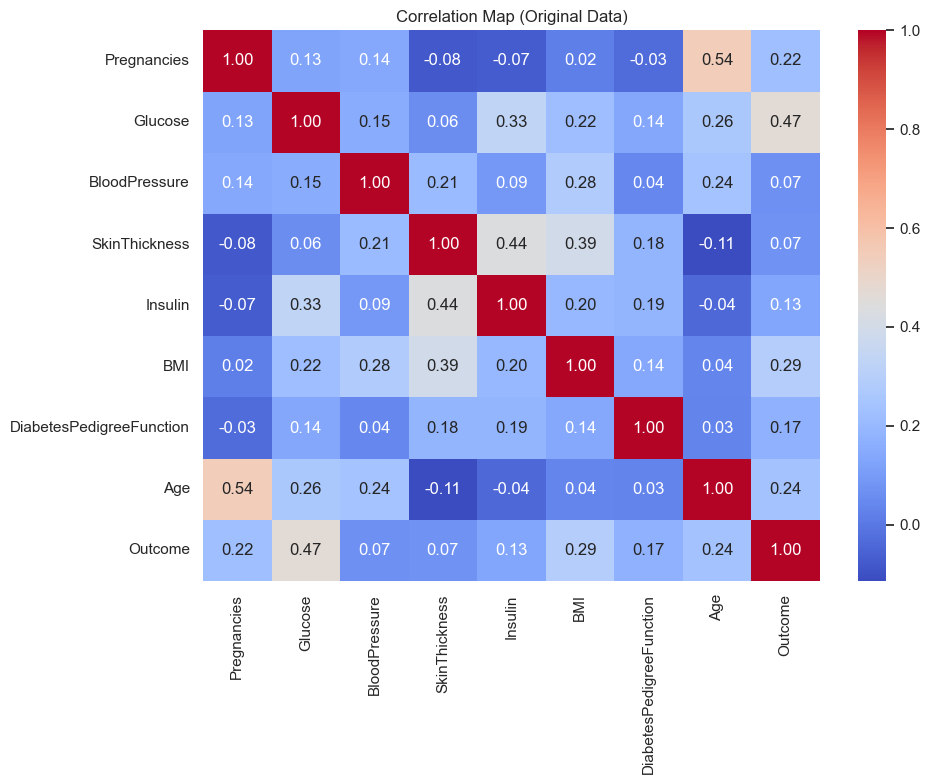

In [10]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Map (Original Data)")
plt.tight_layout()
plt.show()

## Part 2. Data Preprocessing

From the EDA, we can see that some variables should not take the value 0 but are recorded as 0 in the dataset (Glucose, BloodPressure, SkinThickness, Insulin, and BMI). We believe that these zero values do not represent valid physiological measurements and are instead used to indicate missing data.

Therefore, these values are treated as missing values. Rows containing missing values in these variables are removed from the dataset to ensure that the model is trained only on reliable and meaningful data.

### 2.1 Remove Invalid Samples

In [11]:
# Make a copy of original for data cleaning and preprocessing
df_clean = df_original.copy()

# Insert a column "subject_id" for possible future traceability
df_clean.insert(0, 'subject_id', df_clean.index)


# Features where a value of 0 is physiologically impossible and should be treated as missing values
zero_as_missing = [
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI"
]

# Replace 0 values with NaN to indicate missing data and remove rows that contain missing values
df_clean[zero_as_missing] = df_clean[zero_as_missing].replace(0, np.nan)
df_clean.dropna(inplace=True)

# Reset the index
df_clean.reset_index(drop = True)

,subject_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
4,13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...,...
387,753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
388,755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
389,760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
390,763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


### Now we perform the same exploratory analysis on the cleaned dataset

### 2.2 Cleaned Dataset Balance

In [12]:
# Dataset overview

print("======== Dataset Overview ========")
print("Data Shape:", df_clean.shape)

print("\n\n======== Column info (Variables) ========")
print(df_clean.info())

print("\n\n======== Basic statistics ========")
print(df_clean.drop(columns="subject_id").describe())

# Check duplicates
print("\n\n======== Duplicated rows ========")
print(df_clean.duplicated().sum())

======== Dataset Overview ========
Data Shape: (392, 10)


======== Column info (Variables) ========
<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   subject_id                392 non-null    int64  
 1   Pregnancies               392 non-null    int64  
 2   Glucose                   392 non-null    float64
 3   BloodPressure             392 non-null    float64
 4   SkinThickness             392 non-null    float64
 5   Insulin                   392 non-null    float64
 6   BMI                       392 non-null    float64
 7   DiabetesPedigreeFunction  392 non-null    float64
 8   Age                       392 non-null    int64  
 9   Outcome                   392 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 33.7 KB
None


======== Basic statistics ========
       Pregnancies     Glucose  BloodPressure 

From basic statistics, we observed that the minimum value of BloodPressure is 24, which is nearly impossible physiologically. Therefore, we define a plausible range for each variable, and any sample with values outside these ranges is also considered invalid.

In [13]:
# Set plausible ranges for each variable.
plausible_ranges = {
    "Pregnancies": (0, np.inf),
    "Glucose": (40, 600),
    "BloodPressure": (30, 150),
    "SkinThickness": (5, 80),
    "Insulin": (2, 900),
    "BMI": (10, 80),
    "DiabetesPedigreeFunction": (0, 3.0),
    "Age": (21, np.inf)
}

# Remove rows outside plausible ranges
for feature, (lower, upper) in plausible_ranges.items():
    df_clean = df_clean[(df_clean[feature] >= lower) & (df_clean[feature] <= upper)]

# Reset the index
df_clean.reset_index(drop = True)

,subject_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
4,13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...,...
386,753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
387,755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
388,760,2,88.0,58.0,26.0,16.0,28.4,0.766,22,0
389,763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0


### 2.2 Cleaned Dataset Balance

In [14]:
# Number and ratio of each outcome
subjects_per_group_clean = df_clean.groupby("Outcome").size()
subjects_ratio_clean = subjects_per_group_clean / len(df_clean)

# Indicate what 0 and 1 indicate
label_map = {0: "0 (Negative)", 1: "1 (Positive)"}

# Print the number and ratio of each outcome
print("===== Outcome and ratio =====")
for outcome in subjects_per_group_clean.index:
    print(
        f"{label_map[outcome]}    "
        f"{subjects_per_group_clean[outcome]}   "
        f"{subjects_ratio_clean[outcome]:.6f}"
    )

===== Outcome and ratio =====
0 (Negative)    261   0.667519
1 (Positive)    130   0.332481


C:\Users\Qiao\AppData\Local\Temp\ipykernel_12744\2592349873.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label_map[int(t.get_text())] for t in ax.get_xticklabels()])


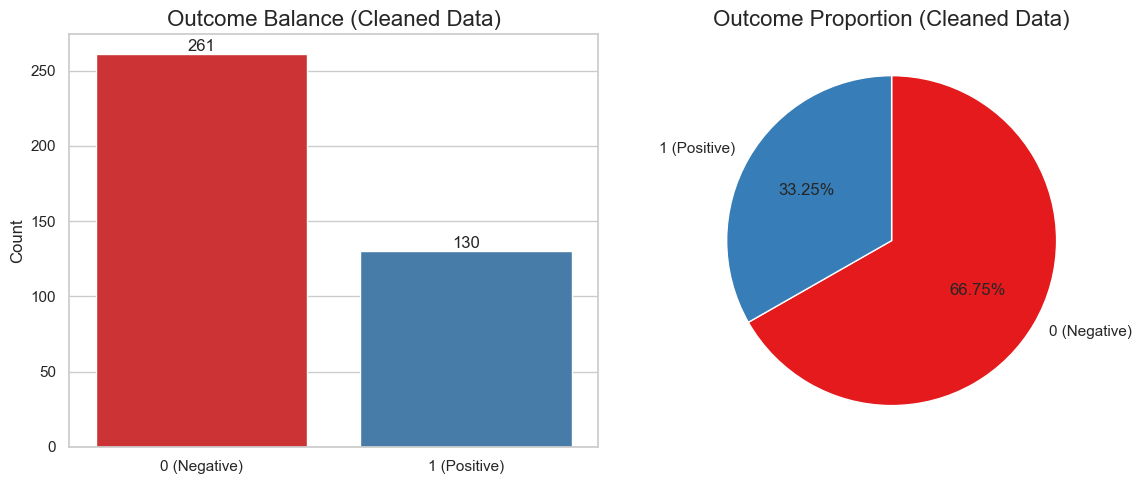

In [15]:
# Visualize dataset balance

# A bar plot and a pie chart for the count and the ratio of each group
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# -------- Bar plot --------
ax = sns.countplot(x="Outcome", data=df_clean, ax=axs[0], hue="Outcome")
ax.set_xticklabels([label_map[int(t.get_text())] for t in ax.get_xticklabels()])
axs[0].set_title("Outcome Balance (Cleaned Data)", fontsize=16)
axs[0].set_xlabel("")
axs[0].set_ylabel("Count")

for container in ax.containers:
    ax.bar_label(container)

ax.get_legend().remove()

# -------- Pie chart --------
axs[1].pie(
    subjects_ratio_clean,
    labels=[label_map[i] for i in subjects_ratio_clean.index],
    autopct="%.2f%%",
    startangle=90,
    counterclock=False
)
axs[1].set_title("Outcome Proportion (Cleaned Data)", fontsize=16)


plt.tight_layout()
plt.show()

### 2.3 Mean values of each group

In [16]:
print("===== Mean values of each group =====")
df_clean.drop(columns="subject_id").groupby("Outcome").mean()

===== Mean values of each group =====


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.727969,111.517241,69.141762,27.283525,131.260536,31.765900,0.471835,28.375479
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462


### 2.4 Distributions and Outliers of Each Feature

C:\Users\Qiao\AppData\Local\Temp\ipykernel_12744\3441979413.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["0 (negative)", "1 (positive)"], fontsize=16)
C:\Users\Qiao\AppData\Local\Temp\ipykernel_12744\3441979413.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["0 (negative)", "1 (positive)"], fontsize=16)
C:\Users\Qiao\AppData\Local\Temp\ipykernel_12744\3441979413.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(["0 (negative)", "1 (positive)"], fontsize=16)
C:\Users\Qiao\AppData\Local\Temp\ipykernel_12744\3441979413.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

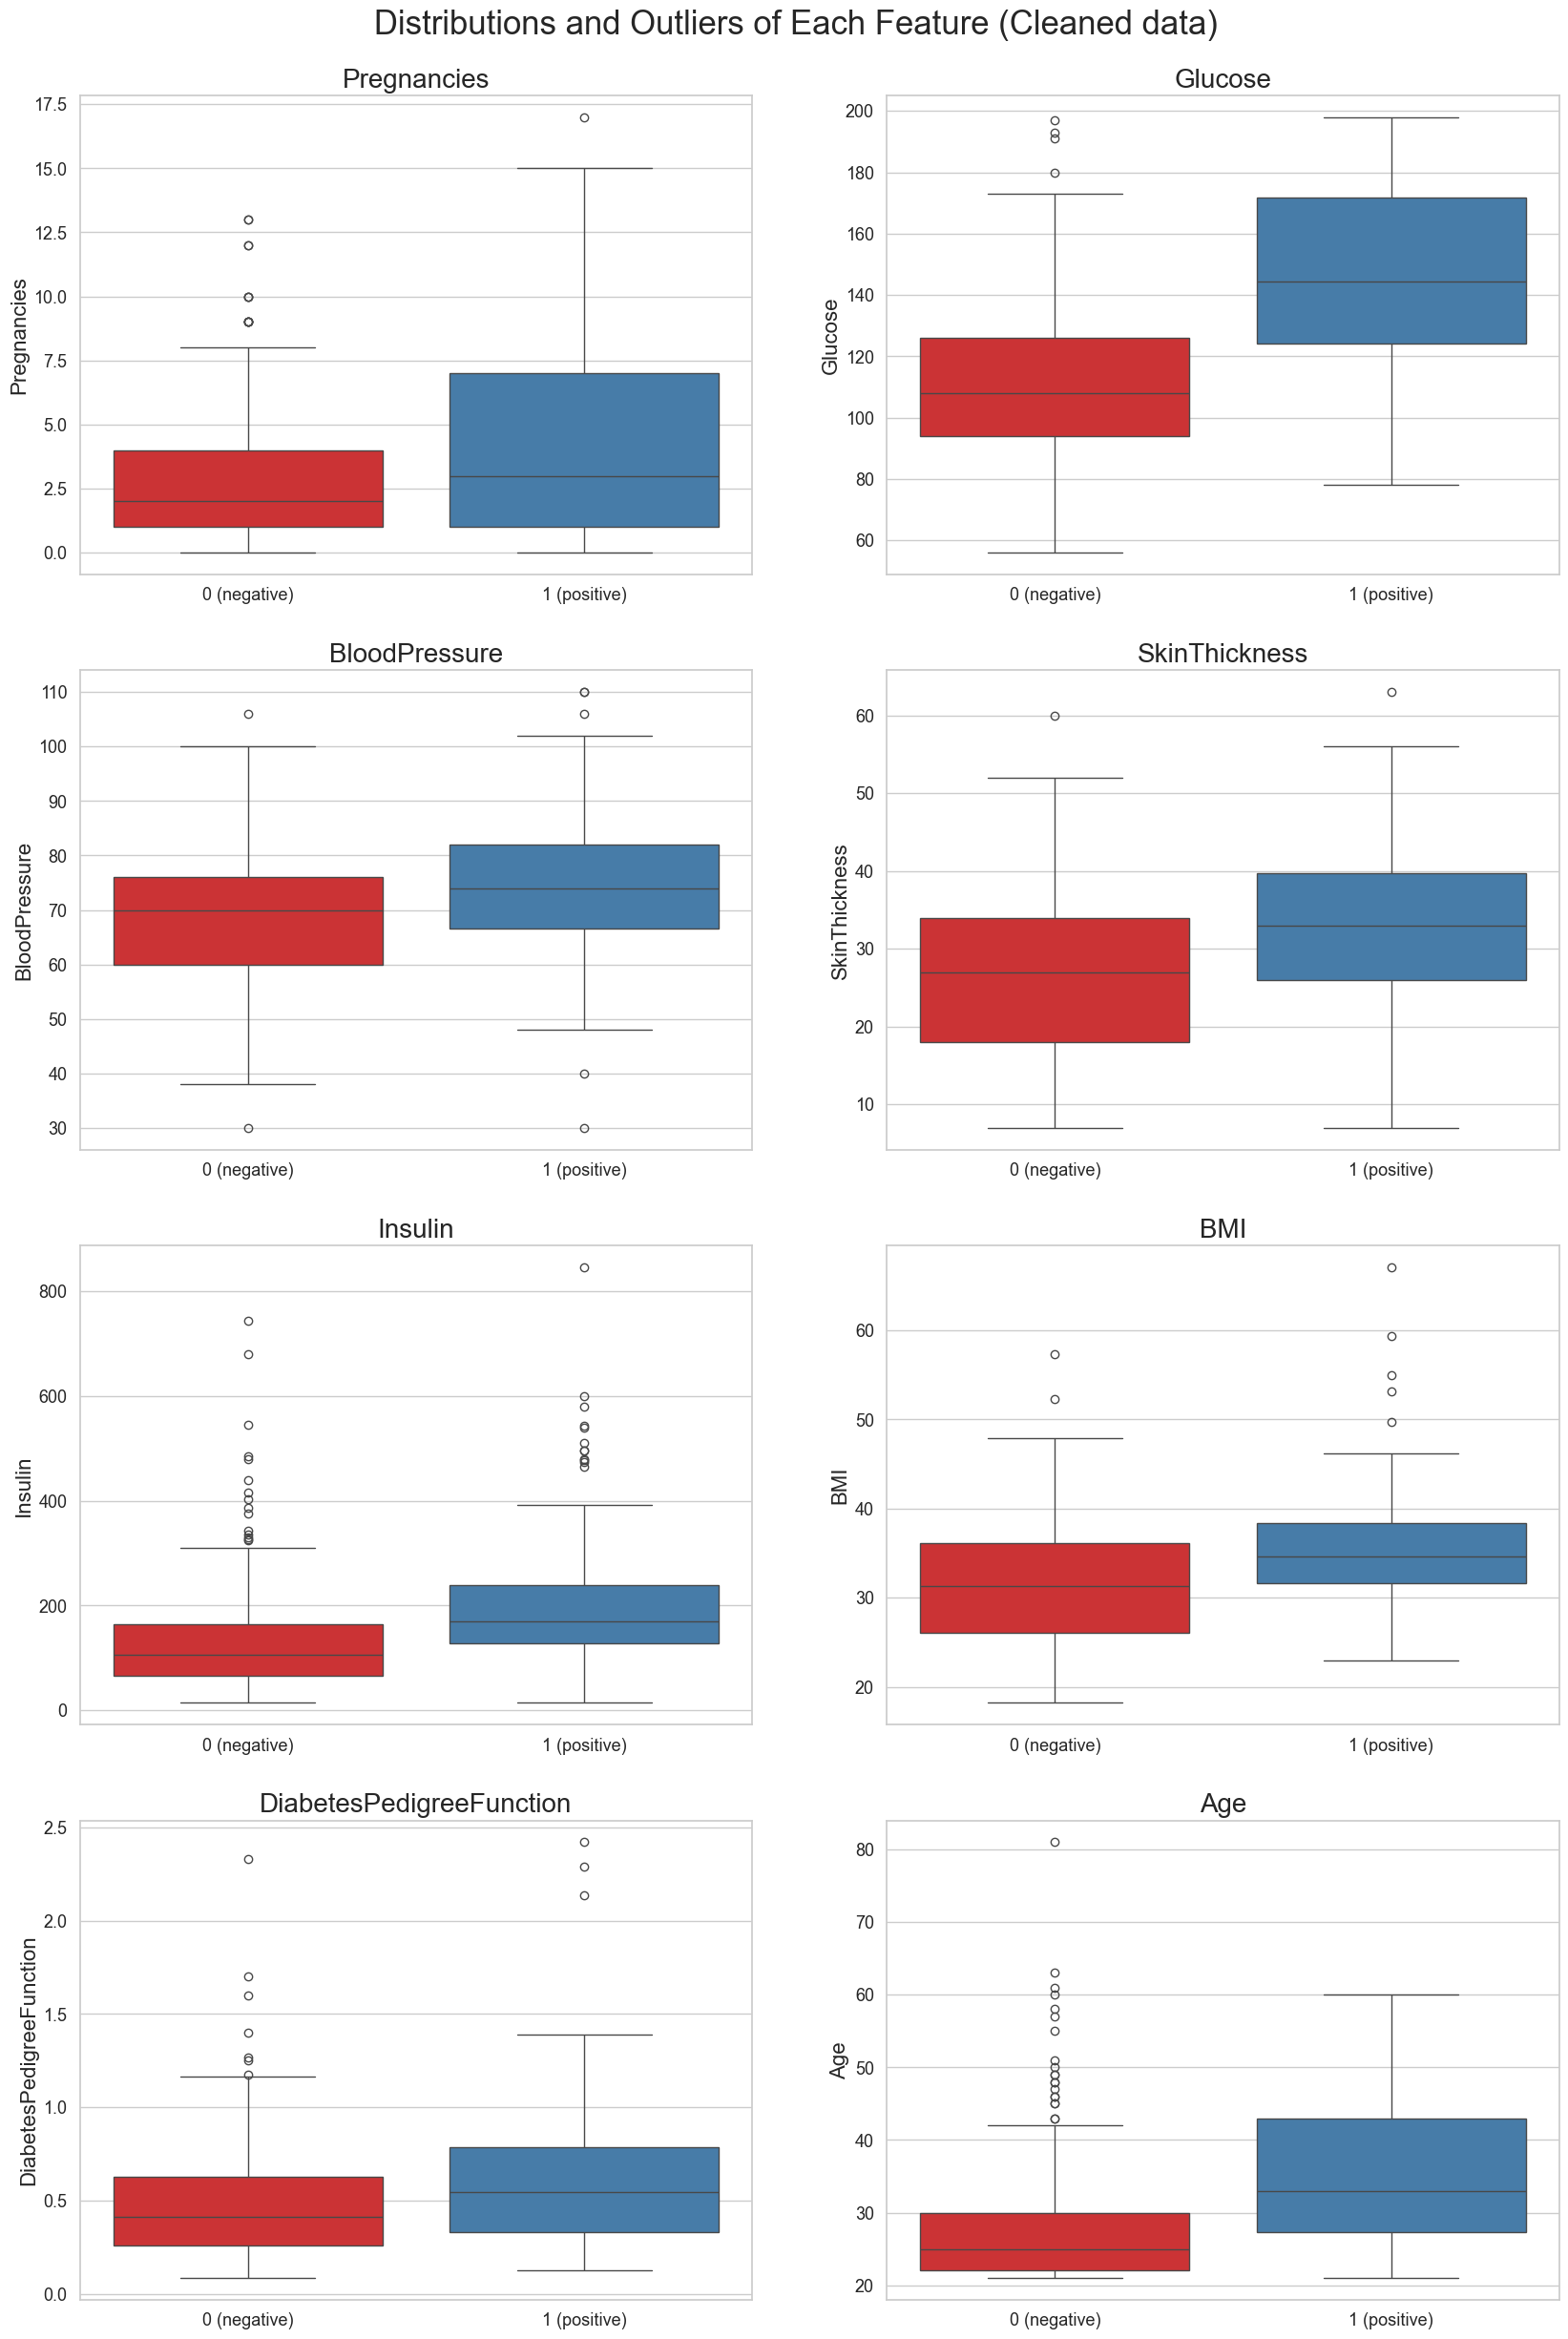

In [17]:
# Select features excluding the target variable 'Outcome'
features = df_clean.columns.drop(["subject_id", "Outcome"])

# Create subplots: 4 rows x 2 columns
fig, axs = plt.subplots(4, 2, figsize=(20, 30))
axs = axs.flatten()

# Plot boxplots for each feature grouped by Outcome
for i, col in enumerate(features):
    sns.boxplot(x="Outcome", y=col, data=df_clean, ax=axs[i], hue="Outcome")
    axs[i].set_xticklabels(["0 (negative)", "1 (positive)"], fontsize=16)
    axs[i].set_title(f"{col}", fontsize=20)
    axs[i].set_xlabel("", fontsize=16)
    axs[i].set_ylabel(col, fontsize=16)
    axs[i].tick_params(axis='y', labelsize=13)
    axs[i].tick_params(axis='x', labelsize=13)

    axs[i].get_legend().remove() if axs[i].get_legend() else None    


# Set title
plt.suptitle("Distributions and Outliers of Each Feature (Cleaned data)", fontsize=25, y=0.91)
plt.show()

### 2.5 Relationships between features

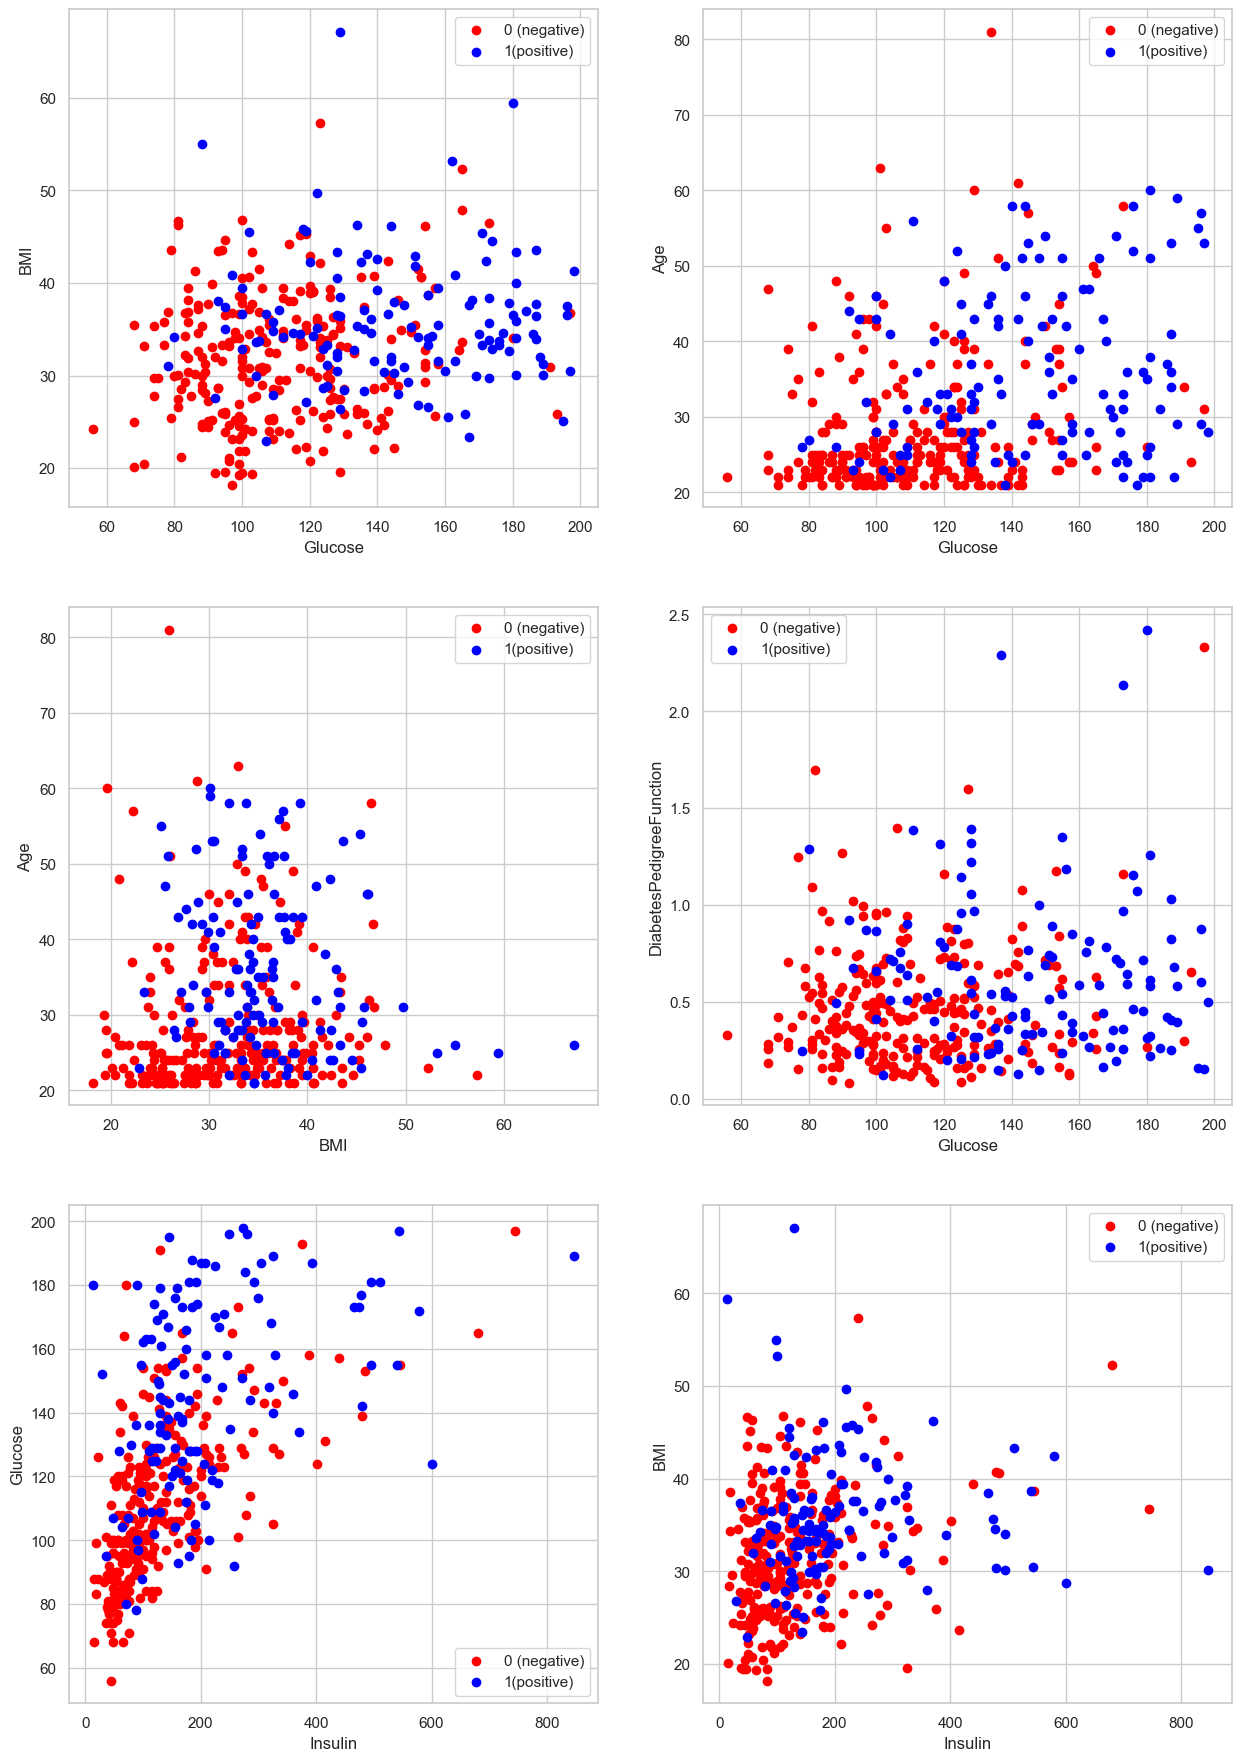

In [18]:
fig, axs = plt.subplots(3, 2,figsize=(15,22))

# Glucose vs BMI
axs[0,0].scatter(df_clean.Glucose[df_clean.Outcome == 0], df_clean.BMI[df_clean.Outcome == 0], color = 'red',  label = '0 (negative)')
axs[0,0].scatter(df_clean.Glucose[df_clean.Outcome == 1], df_clean.BMI[df_clean.Outcome == 1], color = 'blue',  label = '1(positive)')
axs[0,0].set_xlabel('Glucose')
axs[0,0].set_ylabel('BMI')
axs[0,0].legend()

# Glucose vs Age
axs[0,1].scatter(df_clean.Glucose[df_clean.Outcome == 0], df_clean.Age[df_clean.Outcome == 0], color = 'red',  label = '0 (negative)')
axs[0,1].scatter(df_clean.Glucose[df_clean.Outcome == 1], df_clean.Age[df_clean.Outcome == 1], color = 'blue',  label = '1(positive)')
axs[0,1].set_xlabel('Glucose')
axs[0,1].set_ylabel('Age')
axs[0,1].legend()

# BMI vs Age
axs[1,0].scatter(df_clean.BMI[df_clean.Outcome == 0], df_clean.Age[df_clean.Outcome == 0], color = 'red',  label = '0 (negative)')
axs[1,0].scatter(df_clean.BMI[df_clean.Outcome == 1], df_clean.Age[df_clean.Outcome == 1], color = 'blue',  label = '1(positive)')
axs[1,0].set_xlabel('BMI')
axs[1,0].set_ylabel('Age')
axs[1,0].legend()

# Glucose vs DiabetesPedigreeFunction
axs[1,1].scatter(df_clean.Glucose[df_clean.Outcome == 0], df_clean.DiabetesPedigreeFunction[df_clean.Outcome == 0], color = 'red',  label = '0 (negative)')
axs[1,1].scatter(df_clean.Glucose[df_clean.Outcome == 1], df_clean.DiabetesPedigreeFunction[df_clean.Outcome == 1], color = 'blue',  label = '1(positive)')
axs[1,1].set_xlabel('Glucose')
axs[1,1].set_ylabel('DiabetesPedigreeFunction')
axs[1,1].legend()

# Insulin vs Glucose
axs[2,0].scatter(df_clean.Insulin[df_clean.Outcome == 0], df_clean.Glucose[df_clean.Outcome == 0], color = 'red',  label = '0 (negative)')
axs[2,0].scatter(df_clean.Insulin[df_clean.Outcome == 1], df_clean.Glucose[df_clean.Outcome == 1], color = 'blue',  label = '1(positive)')
axs[2,0].set_xlabel('Insulin')
axs[2,0].set_ylabel('Glucose')
axs[2,0].legend()

# Insulin vs BMI
axs[2,1].scatter(df_clean.Insulin[df_clean.Outcome == 0], df_clean.BMI[df_clean.Outcome == 0], color = 'red',  label = '0 (negative)')
axs[2,1].scatter(df_clean.Insulin[df_clean.Outcome == 1], df_clean.BMI[df_clean.Outcome == 1], color = 'blue',  label = '1(positive)')
axs[2,1].set_xlabel('Insulin')
axs[2,1].set_ylabel('BMI')
axs[2,1].legend()

plt.show()

### 1.6 Cleaned data Correlation Matrix

In [19]:
# Compute the correlation matrix for all features and the outcome
corr_matrix = df_clean.drop(columns="subject_id").corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.196718,0.210426,0.091607,0.077129,-0.026766,0.007759,0.679093,0.255604
Glucose,0.196718,1.000000,0.203570,0.196695,0.579929,0.207882,0.140687,0.341870,0.514848
BloodPressure,0.210426,0.203570,1.000000,0.227709,0.089708,0.302881,-0.015250,0.296477,0.189474
SkinThickness,0.091607,0.196695,0.227709,1.000000,0.179967,0.663768,0.160950,0.165766,0.254661
Insulin,0.077129,0.579929,0.089708,0.179967,1.000000,0.224783,0.136415,0.214940,0.300098
BMI,-0.026766,0.207882,0.302881,0.663768,0.224783,1.000000,0.159089,0.068080,0.269128
DiabetesPedigreeFunction,0.007759,0.140687,-0.015250,0.160950,0.136415,0.159089,1.000000,0.085391,0.209653
Age,0.679093,0.341870,0.296477,0.165766,0.214940,0.068080,0.085391,1.000000,0.349701
Outcome,0.255604,0.514848,0.189474,0.254661,0.300098,0.269128,0.209653,0.349701,1.000000


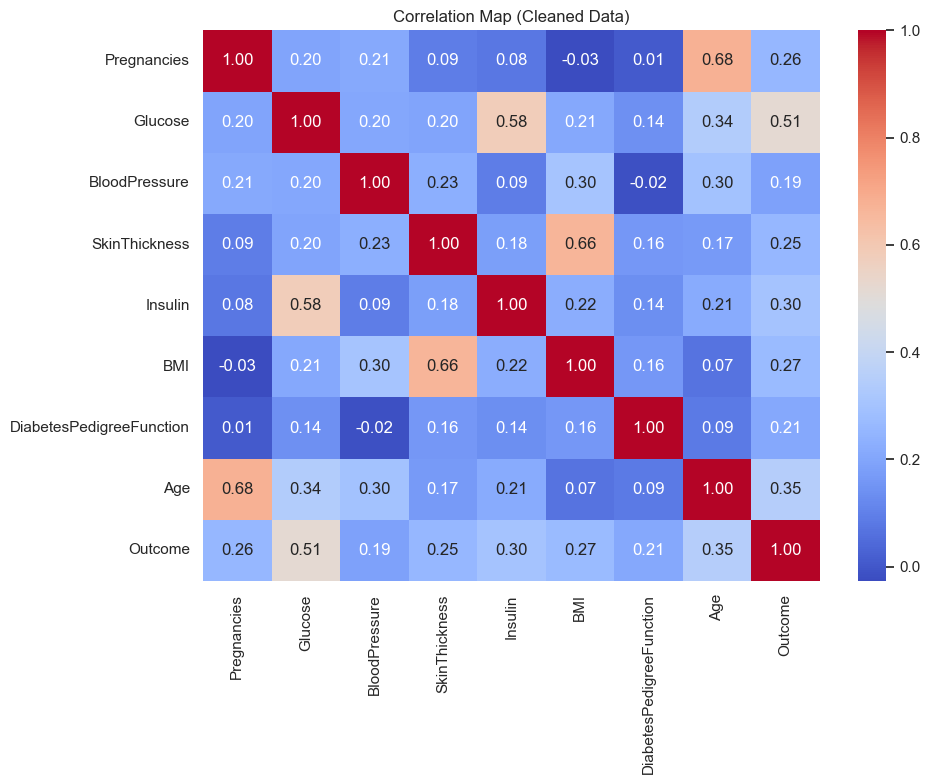

In [20]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Map (Cleaned Data)")
plt.tight_layout()
plt.show()

In [21]:
# Save the cleaned data to csv
df_clean.to_csv("diabetes_cleaned.csv", index=False)